# カテゴリ値を含むデータでのLightGBMを使った分析

### データ
[Adult Data Set](https://archive.ics.uci.edu/ml/datasets/adult) \
[Adult Census Income](https://www.kaggle.com/datasets/uciml/adult-census-income) \
[Adult income dataset](https://www.kaggle.com/datasets/wenruliu/adult-income-dataset)

### 参考
[lightgbmで二値分類の一連の流れをしたメモ](https://qiita.com/d_desuyon/items/807e01311ad08570ee78) \
[【初心者向け】特徴量重要度の算出 (LightGBM) 【Python】【機械学習】](https://mathmatical22.xyz/2020/04/12/%E3%80%90%E5%88%9D%E5%BF%83%E8%80%85%E5%90%91%E3%81%91%E3%80%91%E7%89%B9%E5%BE%B4%E9%87%8F%E9%87%8D%E8%A6%81%E5%BA%A6%E3%81%AE%E7%AE%97%E5%87%BA-lightgbm-%E3%80%90python%E3%80%91%E3%80%90%E6%A9%9F/) \
[LightGBMのCategorical Featureによって精度が向上するか？](https://qiita.com/sinchir0/items/b038757e578b790ec96a) \
[Pythonでしか描けない美しいデシジョンツリー（決定木）をlightGBMでも描こう！](https://qiita.com/hima2b4/items/b356e688ebdabc393da8) \
[LightGBM/XGBoostのtree構造可視化メモ](https://qiita.com/dyamaguc/items/70d4ce3548d49a6256fa) \
[Category Encodersでカテゴリ特徴量をストレスなく変換する](https://qiita.com/Hyperion13fleet/items/afa49a84bd5db65ffc31) \
[カテゴリ変数系特徴量の前処理(scikit-learnとcategory_encoders)](https://qiita.com/FukuharaYohei/items/06cc7b1c5eb124db6cdf) \
[LightGBMのCategorical Featureによって精度が向上するか？](https://qiita.com/sinchir0/items/b038757e578b790ec96a) \
[LightGBMでOptunaを使用するときの再現性確保について](https://book-read-yoshi.hatenablog.com/entry/2021/03/22/lightgbm_optuna_deterministic)

In [1]:
!python -V

Python 3.9.13


In [2]:
!python -m pip --version

pip 23.0.1 from C:\Python39\lib\site-packages\pip (python 3.9)



In [3]:
!python -m pip list

Package                  Version
------------------------ -----------
aiofiles                 22.1.0
aiosqlite                0.18.0
alembic                  1.9.4
anyio                    3.6.2
argon2-cffi              21.3.0
argon2-cffi-bindings     21.2.0
arrow                    1.2.3
asttokens                2.2.1
attrs                    22.2.0
Babel                    2.11.0
backcall                 0.2.0
beautifulsoup4           4.11.2
bleach                   6.0.0
bs4                      0.0.1
category-encoders        2.6.0
certifi                  2022.12.7
cffi                     1.15.1
charset-normalizer       3.0.1
cmaes                    0.9.1
colorama                 0.4.6
colorlog                 6.7.0
comm                     0.1.2
contourpy                1.0.7
cycler                   0.11.0
debugpy                  1.6.6
decorator                5.1.1
defusedxml               0.7.1
executing                1.2.0
fastjsonschema           2.16.2
fonttools        

In [4]:
import pandas as pd
pd.set_option('display.max_rows', 100)
import numpy as np
from sklearn.model_selection import train_test_split
#import lightgbm as lgb
import optuna
# ログを非表示にしたいときは、optuna.logging.disable_default_handler()
# 逆に、表示にしたいときは、optuna.logging.enable_default_handler()
optuna.logging.disable_default_handler()
# optuna経由でLightGBMをインポート
from optuna.integration import lightgbm as lgb
from sklearn.metrics import accuracy_score, f1_score, auc, roc_curve, precision_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('adult_uci_onehot.csv')

In [6]:
df.head(10)

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,fnlwgt,education_1,...,native.country_33,native.country_34,native.country_35,native.country_36,native.country_37,native.country_38,native.country_39,native.country_40,native.country_41,income
0,82,1,0,0,0,0,0,0,132870,1,...,0,0,0,0,0,0,0,0,0,0
1,54,1,0,0,0,0,0,0,140359,0,...,0,0,0,0,0,0,0,0,0,0
2,41,1,0,0,0,0,0,0,264663,0,...,0,0,0,0,0,0,0,0,0,0
3,34,1,0,0,0,0,0,0,216864,1,...,0,0,0,0,0,0,0,0,0,0
4,38,1,0,0,0,0,0,0,150601,0,...,0,0,0,0,0,0,0,0,0,0
5,74,0,1,0,0,0,0,0,88638,0,...,0,0,0,0,0,0,0,0,0,1
6,68,0,0,1,0,0,0,0,422013,1,...,0,0,0,0,0,0,0,0,0,0
7,45,1,0,0,0,0,0,0,172274,0,...,0,0,0,0,0,0,0,0,0,1
8,38,0,0,0,1,0,0,0,164526,0,...,0,0,0,0,0,0,0,0,0,1
9,52,1,0,0,0,0,0,0,129177,0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Columns: 105 entries, age to income
dtypes: int64(105)
memory usage: 24.2 MB


In [8]:
df['income'].value_counts()

0    22654
1     7508
Name: income, dtype: int64

In [9]:
# 不要カラムの削除と並べ替え
'''
df = df[["age",
         "workclass",
         #"fnlwgt",
         "education",
         "education.num",
         "marital.status",
         "occupation",
         "relationship",
         "race",
         "sex",
         "capital.gain",
         "capital.loss",
         "hours.per.week",
         "native.country",
         "income",]]
'''
df = df.drop(["fnlwgt"], axis=1)
df.head(10)

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native.country_33,native.country_34,native.country_35,native.country_36,native.country_37,native.country_38,native.country_39,native.country_40,native.country_41,income
0,82,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,54,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,41,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,34,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,38,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,74,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,68,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,45,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,38,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,52,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [10]:
X = df.drop(['income'], axis=1)
y = df['income']

#Creation of Train and Test dataset
X_train, X_test , y_train, y_test  = train_test_split(X      , y      , test_size=0.2, shuffle=False)

#Creation of Train and validation dataset
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)

In [11]:
print ("Train dataset: {0}{1}".format(X_train.shape, y_train.shape))
print ("Validation dataset: {0}{1}".format(X_valid.shape, y_valid.shape))
print ("Test dataset: {0}{1}".format(X_test.shape, y_test.shape))

Train dataset: (19303, 103)(19303,)
Validation dataset: (4826, 103)(4826,)
Test dataset: (6033, 103)(6033,)


In [12]:
# データセットを生成する
lgb_train = lgb.Dataset(X_train, y_train)
lgb_valid = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

In [13]:
# LightGBMのハイパーパラメータ
params = {
    # 勾配ブースティング木(GBDT:Gradient Boosting Decision Tree)
    'boosting_type': 'gbdt',
    # 二値分類問題
    'objective': 'binary',
    # AUCの最大化を目指す
    'metric': 'auc',
    # 正答率の最大化を目指す
    #'metric': 'binary_error',
    # Fatal の場合出力
    'verbosity': -1,
    # 学習率
    'learning_rate': 0.02,
    'deterministic': True, # 再現性確保用のパラメータ
    'force_row_wise': True  # 再現性確保用のパラメータ
}

In [14]:
booster = lgb.LightGBMTuner(
    params = params,
    train_set = lgb_train,
    valid_sets = lgb_valid,
    verbose_eval = 50,  # 50イテレーション毎に学習結果出力
    num_boost_round = 10000,  # 最大イテレーション回数指定
    early_stopping_rounds = 100,
    optuna_seed = 31, # 再現性確保用のパラメータ
)

In [15]:
'''
lgb.trainを利用すると再現性を確保できない
# 上記のパラメータでモデルを学習する
model = lgb.train(params, train_set=lgb_train, valid_sets=lgb_valid,
                  verbose_eval = 50,  # 50イテレーション毎に学習結果出力
                  num_boost_round = 10000,  # 最大イテレーション回数指定
                  early_stopping_rounds = 100
                 )
'''
# 上記のパラメータでモデルを学習する
booster.run()

feature_fraction, val_score: -inf:   0%|                                                         | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	valid_0's auc: 0.889524
[100]	valid_0's auc: 0.895641
[150]	valid_0's auc: 0.899847
[200]	valid_0's auc: 0.901449
[250]	valid_0's auc: 0.902116
[300]	valid_0's auc: 0.902619
[350]	valid_0's auc: 0.903006
[400]	valid_0's auc: 0.903235
[450]	valid_0's auc: 0.90335
[500]	valid_0's auc: 0.903194
[550]	valid_0's auc: 0.902898
Early stopping, best iteration is:
[454]	valid_0's auc: 0.90337


feature_fraction, val_score: 0.903370:  14%|######4                                      | 1/7 [00:01<00:07,  1.19s/it]C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.891521
[100]	valid_0's auc: 0.896627
[150]	valid_0's auc: 0.900669
[200]	valid_0's auc: 0.902519
[250]	valid_0's auc: 0.902953
[300]	valid_0's auc: 0.903131
[350]	valid_0's auc: 0.903115
[400]	valid_0's auc: 0.903094


feature_fraction, val_score: 0.903370:  29%|############8                                | 2/7 [00:02<00:05,  1.08s/it]

[450]	valid_0's auc: 0.903185
[500]	valid_0's auc: 0.903131
Early stopping, best iteration is:
[434]	valid_0's auc: 0.903226


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.896219
[100]	valid_0's auc: 0.899862
[150]	valid_0's auc: 0.902059
[200]	valid_0's auc: 0.903673
[250]	valid_0's auc: 0.904419
[300]	valid_0's auc: 0.904779
[350]	valid_0's auc: 0.904731
[400]	valid_0's auc: 0.904852


feature_fraction, val_score: 0.904852:  43%|###################2                         | 3/7 [00:03<00:04,  1.03s/it]

[450]	valid_0's auc: 0.904708
Early stopping, best iteration is:
[399]	valid_0's auc: 0.904852


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.898232
[100]	valid_0's auc: 0.901139
[150]	valid_0's auc: 0.903161
[200]	valid_0's auc: 0.904371
[250]	valid_0's auc: 0.905056
[300]	valid_0's auc: 0.905421
[350]	valid_0's auc: 0.905396
[400]	valid_0's auc: 0.905427
[450]	valid_0's auc: 0.905601
[500]	valid_0's auc: 0.905658


feature_fraction, val_score: 0.905694:  57%|#########################7                   | 4/7 [00:04<00:03,  1.09s/it]

[550]	valid_0's auc: 0.905456
Early stopping, best iteration is:
[489]	valid_0's auc: 0.905694
Training until validation scores don't improve for 100 rounds


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	valid_0's auc: 0.897926
[100]	valid_0's auc: 0.900882
[150]	valid_0's auc: 0.902782
[200]	valid_0's auc: 0.904125
[250]	valid_0's auc: 0.904678
[300]	valid_0's auc: 0.905054
[350]	valid_0's auc: 0.905324
[400]	valid_0's auc: 0.905358
[450]	valid_0's auc: 0.905302
Early stopping, best iteration is:
[359]	valid_0's auc: 0.9054


feature_fraction, val_score: 0.905694:  71%|################################1            | 5/7 [00:05<00:02,  1.04s/it]C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.8937
[100]	valid_0's auc: 0.898028
[150]	valid_0's auc: 0.901441
[200]	valid_0's auc: 0.903275
[250]	valid_0's auc: 0.903584
[300]	valid_0's auc: 0.903794
[350]	valid_0's auc: 0.903872


feature_fraction, val_score: 0.905694:  86%|######################################5      | 6/7 [00:06<00:01,  1.09s/it]

[400]	valid_0's auc: 0.903912
[450]	valid_0's auc: 0.903888
Early stopping, best iteration is:
[368]	valid_0's auc: 0.903986


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.895481
[100]	valid_0's auc: 0.899061
[150]	valid_0's auc: 0.901728
[200]	valid_0's auc: 0.90346
[250]	valid_0's auc: 0.904153
[300]	valid_0's auc: 0.904424
[350]	valid_0's auc: 0.904549
[400]	valid_0's auc: 0.904709


feature_fraction, val_score: 0.905694:  86%|######################################5      | 6/7 [00:07<00:01,  1.09s/it]

[450]	valid_0's auc: 0.904767
[500]	valid_0's auc: 0.904665
Early stopping, best iteration is:
[434]	valid_0's auc: 0.904811


num_leaves, val_score: 0.905694:   0%|                                                          | 0/20 [00:00<?, ?it/s]C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.902004
[100]	valid_0's auc: 0.903999
[150]	valid_0's auc: 0.904878
[200]	valid_0's auc: 0.905144
[250]	valid_0's auc: 0.905082


num_leaves, val_score: 0.905694:   5%|##5                                               | 1/20 [00:01<00:20,  1.10s/it]

[300]	valid_0's auc: 0.905103
Early stopping, best iteration is:
[233]	valid_0's auc: 0.905276


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.902335
[100]	valid_0's auc: 0.903581
[150]	valid_0's auc: 0.90349
[200]	valid_0's auc: 0.902785
Early stopping, best iteration is:
[127]	valid_0's auc: 0.903873


num_leaves, val_score: 0.905694:  10%|#####                                             | 2/20 [00:02<00:24,  1.38s/it]C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.902414
[100]	valid_0's auc: 0.903793
[150]	valid_0's auc: 0.903832
[200]	valid_0's auc: 0.903293
Early stopping, best iteration is:
[127]	valid_0's auc: 0.904116


num_leaves, val_score: 0.905694:  15%|#######5                                          | 3/20 [00:04<00:23,  1.39s/it]C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.902346
[100]	valid_0's auc: 0.903648
[150]	valid_0's auc: 0.903563


num_leaves, val_score: 0.905694:  20%|##########                                        | 4/20 [00:05<00:22,  1.44s/it]

[200]	valid_0's auc: 0.902763
Early stopping, best iteration is:
[117]	valid_0's auc: 0.903903


num_leaves, val_score: 0.905694:  20%|##########                                        | 4/20 [00:05<00:22,  1.44s/it]C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.901106
[100]	valid_0's auc: 0.903291
[150]	valid_0's auc: 0.904628
[200]	valid_0's auc: 0.905112
[250]	valid_0's auc: 0.90528
[300]	valid_0's auc: 0.90545
[350]	valid_0's auc: 0.905287
Early stopping, best iteration is:
[274]	valid_0's auc: 0.905512


num_leaves, val_score: 0.905694:  25%|############5                                     | 5/20 [00:06<00:19,  1.30s/it]C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.899136
[100]	valid_0's auc: 0.901821
[150]	valid_0's auc: 0.903768
[200]	valid_0's auc: 0.904823
[250]	valid_0's auc: 0.905295
[300]	valid_0's auc: 0.905643
[350]	valid_0's auc: 0.905517


num_leaves, val_score: 0.905694:  30%|###############                                   | 6/20 [00:07<00:16,  1.16s/it]

[400]	valid_0's auc: 0.905492
Early stopping, best iteration is:
[305]	valid_0's auc: 0.905651
Training until validation scores don't improve for 100 rounds


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	valid_0's auc: 0.902368
[100]	valid_0's auc: 0.903719
[150]	valid_0's auc: 0.903588


num_leaves, val_score: 0.905694:  35%|#################5                                | 7/20 [00:09<00:16,  1.27s/it]

[200]	valid_0's auc: 0.902823
Early stopping, best iteration is:
[117]	valid_0's auc: 0.904008


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.895027
[100]	valid_0's auc: 0.899124
[150]	valid_0's auc: 0.901246
[200]	valid_0's auc: 0.902866
[250]	valid_0's auc: 0.903984
[300]	valid_0's auc: 0.904951
[350]	valid_0's auc: 0.905438
[400]	valid_0's auc: 0.905605
[450]	valid_0's auc: 0.905954
[500]	valid_0's auc: 0.906077
[550]	valid_0's auc: 0.906137
[600]	valid_0's auc: 0.906193
[650]	valid_0's auc: 0.90622


num_leaves, val_score: 0.906278:  40%|####################                              | 8/20 [00:10<00:14,  1.24s/it]

[700]	valid_0's auc: 0.90623
[750]	valid_0's auc: 0.906199
Early stopping, best iteration is:
[656]	valid_0's auc: 0.906278


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.895911
[100]	valid_0's auc: 0.899758
[150]	valid_0's auc: 0.901746
[200]	valid_0's auc: 0.903235
[250]	valid_0's auc: 0.904223
[300]	valid_0's auc: 0.905054
[350]	valid_0's auc: 0.905484
[400]	valid_0's auc: 0.905689
[450]	valid_0's auc: 0.906007
[500]	valid_0's auc: 0.906176
[550]	valid_0's auc: 0.906228


num_leaves, val_score: 0.906278:  45%|######################5                           | 9/20 [00:11<00:12,  1.15s/it]

[600]	valid_0's auc: 0.906139
Early stopping, best iteration is:
[509]	valid_0's auc: 0.906255
Training until validation scores don't improve for 100 rounds


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	valid_0's auc: 0.902309
[100]	valid_0's auc: 0.903689
[150]	valid_0's auc: 0.904109
[200]	valid_0's auc: 0.903795


num_leaves, val_score: 0.906278:  50%|########################5                        | 10/20 [00:12<00:10,  1.08s/it]

Early stopping, best iteration is:
[127]	valid_0's auc: 0.904242
Training until validation scores don't improve for 100 rounds


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	valid_0's auc: 0.902357
[100]	valid_0's auc: 0.903802
[150]	valid_0's auc: 0.904158
[200]	valid_0's auc: 0.903978


num_leaves, val_score: 0.906278:  55%|##########################9                      | 11/20 [00:12<00:09,  1.03s/it]

Early stopping, best iteration is:
[127]	valid_0's auc: 0.90438
Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.879586


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's auc: 0.887522
[150]	valid_0's auc: 0.892082
[200]	valid_0's auc: 0.895289
[250]	valid_0's auc: 0.896851
[300]	valid_0's auc: 0.898636
[350]	valid_0's auc: 0.899584
[400]	valid_0's auc: 0.900367
[450]	valid_0's auc: 0.901473
[500]	valid_0's auc: 0.902017
[550]	valid_0's auc: 0.902581
[600]	valid_0's auc: 0.902886
[650]	valid_0's auc: 0.903082
[700]	valid_0's auc: 0.903289
[750]	valid_0's auc: 0.903626
[800]	valid_0's auc: 0.903949
[850]	valid_0's auc: 0.904198
[900]	valid_0's auc: 0.904349
[950]	valid_0's auc: 0.904635
[1000]	valid_0's auc: 0.904839
[1050]	valid_0's auc: 0.904929
[1100]	valid_0's auc: 0.905066
[1150]	valid_0's auc: 0.90519
[1200]	valid_0's auc: 0.905361
[1250]	valid_0's auc: 0.905413
[1300]	valid_0's auc: 0.905484
[1350]	valid_0's auc: 0.905545
[1400]	valid_0's auc: 0.905648
[1450]	valid_0's auc: 0.905699
[1500]	valid_0's auc: 0.90569
[1550]	valid_0's auc: 0.905749
[1600]	valid_0's auc: 0.905773
[1650]	valid_0's auc: 0.905815
[1700]	valid_0's auc: 0.9058

num_leaves, val_score: 0.906278:  60%|#############################4                   | 12/20 [00:15<00:10,  1.37s/it]

Early stopping, best iteration is:
[2268]	valid_0's auc: 0.906214
Training until validation scores don't improve for 100 rounds


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	valid_0's auc: 0.902339
[100]	valid_0's auc: 0.903916
[150]	valid_0's auc: 0.90457
[200]	valid_0's auc: 0.904617


num_leaves, val_score: 0.906278:  65%|###############################8                 | 13/20 [00:16<00:08,  1.23s/it]

[250]	valid_0's auc: 0.904426
Early stopping, best iteration is:
[173]	valid_0's auc: 0.904677


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.872565
[100]	valid_0's auc: 0.880405
[150]	valid_0's auc: 0.885124
[200]	valid_0's auc: 0.889373
[250]	valid_0's auc: 0.892119
[300]	valid_0's auc: 0.894565
[350]	valid_0's auc: 0.895877
[400]	valid_0's auc: 0.897267
[450]	valid_0's auc: 0.898163
[500]	valid_0's auc: 0.898838
[550]	valid_0's auc: 0.899671
[600]	valid_0's auc: 0.900221
[650]	valid_0's auc: 0.900771
[700]	valid_0's auc: 0.901246
[750]	valid_0's auc: 0.901649
[800]	valid_0's auc: 0.901861
[850]	valid_0's auc: 0.902145
[900]	valid_0's auc: 0.902359
[950]	valid_0's auc: 0.902691
[1000]	valid_0's auc: 0.902856
[1050]	valid_0's auc: 0.903142
[1100]	valid_0's auc: 0.903353
[1150]	valid_0's auc: 0.903509
[1200]	valid_0's auc: 0.903719
[1250]	valid_0's auc: 0.903908
[1300]	valid_0's auc: 0.904097
[1350]	valid_0's auc: 0.90422
[1400]	valid_0's auc: 0.904347
[1450]	valid_0's auc: 0.904501
[1500]	valid_0's auc: 0.904592
[1550]	valid_0's auc: 0.90463

num_leaves, val_score: 0.906278:  70%|##################################3              | 14/20 [00:18<00:09,  1.55s/it]

[2700]	valid_0's auc: 0.905373
Early stopping, best iteration is:
[2606]	valid_0's auc: 0.905418
Training until validation scores don't improve for 100 rounds


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	valid_0's auc: 0.902462
[100]	valid_0's auc: 0.903925
[150]	valid_0's auc: 0.90462
[200]	valid_0's auc: 0.904617
[250]	valid_0's auc: 0.904487
Early stopping, best iteration is:
[166]	valid_0's auc: 0.904718


num_leaves, val_score: 0.906278:  75%|####################################7            | 15/20 [00:19<00:06,  1.38s/it]C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.898818
[100]	valid_0's auc: 0.901625
[150]	valid_0's auc: 0.903515
[200]	valid_0's auc: 0.904568
[250]	valid_0's auc: 0.905099
[300]	valid_0's auc: 0.905472
[350]	valid_0's auc: 0.90554
[400]	valid_0's auc: 0.905551
[450]	valid_0's auc: 0.905681
[500]	valid_0's auc: 0.905753
[550]	valid_0's auc: 0.905611


num_leaves, val_score: 0.906278:  80%|#######################################2         | 16/20 [00:20<00:05,  1.31s/it]

[600]	valid_0's auc: 0.905267
Early stopping, best iteration is:
[506]	valid_0's auc: 0.905804


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.902467
[100]	valid_0's auc: 0.903812
[150]	valid_0's auc: 0.904022


num_leaves, val_score: 0.906278:  85%|#########################################6       | 17/20 [00:21<00:03,  1.25s/it]

[200]	valid_0's auc: 0.903472
Early stopping, best iteration is:
[127]	valid_0's auc: 0.904229


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.90205
[100]	valid_0's auc: 0.903886
[150]	valid_0's auc: 0.904731
[200]	valid_0's auc: 0.904823
[250]	valid_0's auc: 0.904773


num_leaves, val_score: 0.906278:  90%|############################################1    | 18/20 [00:22<00:02,  1.18s/it]

[300]	valid_0's auc: 0.904694
Early stopping, best iteration is:
[231]	valid_0's auc: 0.904965


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.898576
[100]	valid_0's auc: 0.901449
[150]	valid_0's auc: 0.903326
[200]	valid_0's auc: 0.904476
[250]	valid_0's auc: 0.905058
[300]	valid_0's auc: 0.90549
[350]	valid_0's auc: 0.905495
[400]	valid_0's auc: 0.905469
[450]	valid_0's auc: 0.905651
[500]	valid_0's auc: 0.905781
[550]	valid_0's auc: 0.905661


num_leaves, val_score: 0.906278:  95%|##############################################5  | 19/20 [00:23<00:01,  1.20s/it]

[600]	valid_0's auc: 0.905533
Early stopping, best iteration is:
[507]	valid_0's auc: 0.905862


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.901666
[100]	valid_0's auc: 0.903644
[150]	valid_0's auc: 0.904705
[200]	valid_0's auc: 0.905134
[250]	valid_0's auc: 0.90524


num_leaves, val_score: 0.906278: 100%|#################################################| 20/20 [00:24<00:00,  1.24s/it]


[300]	valid_0's auc: 0.905131
Early stopping, best iteration is:
[246]	valid_0's auc: 0.905332


bagging, val_score: 0.906278:   0%|                                                             | 0/10 [00:00<?, ?it/s]C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.895575
[100]	valid_0's auc: 0.899203
[150]	valid_0's auc: 0.90173
[200]	valid_0's auc: 0.903823
[250]	valid_0's auc: 0.904663
[300]	valid_0's auc: 0.905282
[350]	valid_0's auc: 0.905814
[400]	valid_0's auc: 0.905993


bagging, val_score: 0.906278:  10%|#####3                                               | 1/10 [00:00<00:08,  1.10it/s]

[450]	valid_0's auc: 0.906034
[500]	valid_0's auc: 0.906005
Early stopping, best iteration is:
[413]	valid_0's auc: 0.906167
Training until validation scores don't improve for 100 rounds


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	valid_0's auc: 0.895136
[100]	valid_0's auc: 0.898882
[150]	valid_0's auc: 0.901232
[200]	valid_0's auc: 0.903135
[250]	valid_0's auc: 0.904218
[300]	valid_0's auc: 0.904958
[350]	valid_0's auc: 0.905337
[400]	valid_0's auc: 0.905644
[450]	valid_0's auc: 0.905829
[500]	valid_0's auc: 0.90606
[550]	valid_0's auc: 0.906228
[600]	valid_0's auc: 0.906239


bagging, val_score: 0.906352:  20%|##########6                                          | 2/10 [00:02<00:09,  1.13s/it]

[650]	valid_0's auc: 0.906282
Early stopping, best iteration is:
[583]	valid_0's auc: 0.906352


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.895481
[100]	valid_0's auc: 0.899559
[150]	valid_0's auc: 0.90203
[200]	valid_0's auc: 0.903735
[250]	valid_0's auc: 0.904745
[300]	valid_0's auc: 0.905314
[350]	valid_0's auc: 0.905841
[400]	valid_0's auc: 0.906246
[450]	valid_0's auc: 0.906367
[500]	valid_0's auc: 0.906574


bagging, val_score: 0.906635:  30%|###############9                                     | 3/10 [00:03<00:08,  1.16s/it]

[550]	valid_0's auc: 0.906416
[600]	valid_0's auc: 0.906481
Early stopping, best iteration is:
[510]	valid_0's auc: 0.906635


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.894984
[100]	valid_0's auc: 0.899185
[150]	valid_0's auc: 0.901411
[200]	valid_0's auc: 0.903041
[250]	valid_0's auc: 0.904103
[300]	valid_0's auc: 0.904968
[350]	valid_0's auc: 0.905364
[400]	valid_0's auc: 0.905604
[450]	valid_0's auc: 0.906041
[500]	valid_0's auc: 0.90606
[550]	valid_0's auc: 0.906111
[600]	valid_0's auc: 0.906112
[650]	valid_0's auc: 0.906191
[700]	valid_0's auc: 0.906179
[750]	valid_0's auc: 0.906169
[800]	valid_0's auc: 0.906192


bagging, val_score: 0.906635:  40%|#####################2                               | 4/10 [00:04<00:07,  1.25s/it]

[850]	valid_0's auc: 0.906136
[900]	valid_0's auc: 0.906086
Early stopping, best iteration is:
[820]	valid_0's auc: 0.906255


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.895403
[100]	valid_0's auc: 0.899428
[150]	valid_0's auc: 0.90179
[200]	valid_0's auc: 0.903149
[250]	valid_0's auc: 0.904023
[300]	valid_0's auc: 0.904798
[350]	valid_0's auc: 0.905124
[400]	valid_0's auc: 0.905606


bagging, val_score: 0.906635:  50%|##########################5                          | 5/10 [00:05<00:05,  1.14s/it]

[450]	valid_0's auc: 0.905759
[500]	valid_0's auc: 0.905737
[550]	valid_0's auc: 0.905653
Early stopping, best iteration is:
[457]	valid_0's auc: 0.90585


bagging, val_score: 0.906635:  50%|##########################5                          | 5/10 [00:05<00:05,  1.14s/it]C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.895492
[100]	valid_0's auc: 0.900354
[150]	valid_0's auc: 0.902693
[200]	valid_0's auc: 0.904059
[250]	valid_0's auc: 0.904895
[300]	valid_0's auc: 0.905552
[350]	valid_0's auc: 0.90577
[400]	valid_0's auc: 0.905861
[450]	valid_0's auc: 0.906133
[500]	valid_0's auc: 0.906227
[550]	valid_0's auc: 0.906156


bagging, val_score: 0.906635:  60%|###############################8                     | 6/10 [00:06<00:04,  1.17s/it]

[600]	valid_0's auc: 0.906212
[650]	valid_0's auc: 0.906116
Early stopping, best iteration is:
[587]	valid_0's auc: 0.906262


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.895386
[100]	valid_0's auc: 0.899535
[150]	valid_0's auc: 0.901703
[200]	valid_0's auc: 0.903196
[250]	valid_0's auc: 0.904263
[300]	valid_0's auc: 0.90514
[350]	valid_0's auc: 0.905483
[400]	valid_0's auc: 0.905831
[450]	valid_0's auc: 0.905987
[500]	valid_0's auc: 0.906084
[550]	valid_0's auc: 0.90635


bagging, val_score: 0.906635:  70%|#####################################                | 7/10 [00:08<00:03,  1.18s/it]

[600]	valid_0's auc: 0.906254
Early stopping, best iteration is:
[549]	valid_0's auc: 0.906352


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.896217
[100]	valid_0's auc: 0.900158
[150]	valid_0's auc: 0.902372
[200]	valid_0's auc: 0.904038
[250]	valid_0's auc: 0.905035
[300]	valid_0's auc: 0.90552
[350]	valid_0's auc: 0.905888
[400]	valid_0's auc: 0.906175
[450]	valid_0's auc: 0.906118
[500]	valid_0's auc: 0.906322
[550]	valid_0's auc: 0.906355


bagging, val_score: 0.906635:  80%|##########################################4          | 8/10 [00:09<00:02,  1.20s/it]

[600]	valid_0's auc: 0.906366
[650]	valid_0's auc: 0.906175
Early stopping, best iteration is:
[553]	valid_0's auc: 0.906406
Training until validation scores don't improve for 100 rounds


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	valid_0's auc: 0.89598
[100]	valid_0's auc: 0.899383
[150]	valid_0's auc: 0.90173
[200]	valid_0's auc: 0.903418
[250]	valid_0's auc: 0.904257
[300]	valid_0's auc: 0.904889
[350]	valid_0's auc: 0.905355
[400]	valid_0's auc: 0.905704
[450]	valid_0's auc: 0.906006
[500]	valid_0's auc: 0.90616
[550]	valid_0's auc: 0.906175
[600]	valid_0's auc: 0.906157
[650]	valid_0's auc: 0.906096


bagging, val_score: 0.906635:  90%|###############################################7     | 9/10 [00:10<00:01,  1.15s/it]

Early stopping, best iteration is:
[565]	valid_0's auc: 0.906228
Training until validation scores don't improve for 100 rounds


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	valid_0's auc: 0.895453
[100]	valid_0's auc: 0.899286
[150]	valid_0's auc: 0.901739
[200]	valid_0's auc: 0.903878
[250]	valid_0's auc: 0.904804
[300]	valid_0's auc: 0.905346
[350]	valid_0's auc: 0.905818
[400]	valid_0's auc: 0.906037
[450]	valid_0's auc: 0.906095
[500]	valid_0's auc: 0.906051
[550]	valid_0's auc: 0.906245
[600]	valid_0's auc: 0.906184


bagging, val_score: 0.906635: 100%|####################################################| 10/10 [00:11<00:00,  1.16s/it]


[650]	valid_0's auc: 0.906297
[700]	valid_0's auc: 0.905956
Early stopping, best iteration is:
[615]	valid_0's auc: 0.906354


feature_fraction_stage2, val_score: 0.906635:   0%|                                              | 0/3 [00:00<?, ?it/s]C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.896059
[100]	valid_0's auc: 0.899438
[150]	valid_0's auc: 0.902088
[200]	valid_0's auc: 0.903751
[250]	valid_0's auc: 0.904614
[300]	valid_0's auc: 0.905284
[350]	valid_0's auc: 0.905818
[400]	valid_0's auc: 0.906132
[450]	valid_0's auc: 0.906322
[500]	valid_0's auc: 0.906389
[550]	valid_0's auc: 0.90625


feature_fraction_stage2, val_score: 0.906635:  33%|############6                         | 1/3 [00:01<00:02,  1.11s/it]

[600]	valid_0's auc: 0.906306
Early stopping, best iteration is:
[503]	valid_0's auc: 0.906446
Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.895601


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's auc: 0.899664
[150]	valid_0's auc: 0.902228
[200]	valid_0's auc: 0.903819
[250]	valid_0's auc: 0.904756
[300]	valid_0's auc: 0.9053
[350]	valid_0's auc: 0.905751
[400]	valid_0's auc: 0.906116
[450]	valid_0's auc: 0.906269
[500]	valid_0's auc: 0.906392
[550]	valid_0's auc: 0.906299
[600]	valid_0's auc: 0.90633
[650]	valid_0's auc: 0.906163
Early stopping, best iteration is:
[572]	valid_0's auc: 0.90645


feature_fraction_stage2, val_score: 0.906635:  67%|#########################3            | 2/3 [00:02<00:01,  1.11s/it]C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.895382
[100]	valid_0's auc: 0.899375
[150]	valid_0's auc: 0.901857
[200]	valid_0's auc: 0.903462
[250]	valid_0's auc: 0.904355
[300]	valid_0's auc: 0.904941
[350]	valid_0's auc: 0.905312
[400]	valid_0's auc: 0.905642
[450]	valid_0's auc: 0.905724
[500]	valid_0's auc: 0.905828
[550]	valid_0's auc: 0.905775
[600]	valid_0's auc: 0.90592


feature_fraction_stage2, val_score: 0.906635: 100%|######################################| 3/3 [00:03<00:00,  1.10s/it]


[650]	valid_0's auc: 0.905703
Early stopping, best iteration is:
[582]	valid_0's auc: 0.906002


regularization_factors, val_score: 0.906635:   0%|                                              | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds

C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "



[50]	valid_0's auc: 0.894686
[100]	valid_0's auc: 0.898992
[150]	valid_0's auc: 0.90146
[200]	valid_0's auc: 0.903235
[250]	valid_0's auc: 0.904264
[300]	valid_0's auc: 0.905062
[350]	valid_0's auc: 0.905506
[400]	valid_0's auc: 0.905837
[450]	valid_0's auc: 0.906
[500]	valid_0's auc: 0.906169
[550]	valid_0's auc: 0.906277
[600]	valid_0's auc: 0.906399
[650]	valid_0's auc: 0.906404
[700]	valid_0's auc: 0.906323


regularization_factors, val_score: 0.906635:   5%|#9                                    | 1/20 [00:01<00:24,  1.29s/it]

[750]	valid_0's auc: 0.906275
Early stopping, best iteration is:
[665]	valid_0's auc: 0.906438
Training until validation scores don't improve for 100 rounds


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	valid_0's auc: 0.893766
[100]	valid_0's auc: 0.898393
[150]	valid_0's auc: 0.900872
[200]	valid_0's auc: 0.902665
[250]	valid_0's auc: 0.904
[300]	valid_0's auc: 0.904807
[350]	valid_0's auc: 0.905266
[400]	valid_0's auc: 0.905589
[450]	valid_0's auc: 0.90581
[500]	valid_0's auc: 0.905955
[550]	valid_0's auc: 0.906052
[600]	valid_0's auc: 0.906071
[650]	valid_0's auc: 0.906073
[700]	valid_0's auc: 0.906082
[750]	valid_0's auc: 0.906052
Early stopping, best iteration is:
[664]	valid_0's auc: 0.906113


regularization_factors, val_score: 0.906635:  10%|###8                                  | 2/20 [00:02<00:23,  1.30s/it]C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.895481
[100]	valid_0's auc: 0.899559
[150]	valid_0's auc: 0.90203
[200]	valid_0's auc: 0.903735
[250]	valid_0's auc: 0.904745
[300]	valid_0's auc: 0.905314
[350]	valid_0's auc: 0.905841
[400]	valid_0's auc: 0.906237
[450]	valid_0's auc: 0.906385
[500]	valid_0's auc: 0.906559
[550]	valid_0's auc: 0.906441


regularization_factors, val_score: 0.906642:  15%|#####7                                | 3/20 [00:03<00:20,  1.19s/it]

[600]	valid_0's auc: 0.906544
Early stopping, best iteration is:
[515]	valid_0's auc: 0.906642
Training until validation scores don't improve for 100 rounds


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	valid_0's auc: 0.894693
[100]	valid_0's auc: 0.898989
[150]	valid_0's auc: 0.901336
[200]	valid_0's auc: 0.903058
[250]	valid_0's auc: 0.90415
[300]	valid_0's auc: 0.904818
[350]	valid_0's auc: 0.90534
[400]	valid_0's auc: 0.90552
[450]	valid_0's auc: 0.905752
[500]	valid_0's auc: 0.905906
[550]	valid_0's auc: 0.90597
[600]	valid_0's auc: 0.906069


regularization_factors, val_score: 0.906642:  20%|#######6                              | 4/20 [00:04<00:19,  1.21s/it]

[650]	valid_0's auc: 0.905943
Early stopping, best iteration is:
[570]	valid_0's auc: 0.906096
Training until validation scores don't improve for 100 rounds


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	valid_0's auc: 0.895466
[100]	valid_0's auc: 0.899551
[150]	valid_0's auc: 0.902013
[200]	valid_0's auc: 0.903627
[250]	valid_0's auc: 0.904671
[300]	valid_0's auc: 0.905281
[350]	valid_0's auc: 0.905789
[400]	valid_0's auc: 0.906183
[450]	valid_0's auc: 0.906328
[500]	valid_0's auc: 0.906524
[550]	valid_0's auc: 0.906483
[600]	valid_0's auc: 0.906457
Early stopping, best iteration is:
[515]	valid_0's auc: 0.906621


regularization_factors, val_score: 0.906642:  25%|#########5                            | 5/20 [00:05<00:17,  1.17s/it]C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.895481
[100]	valid_0's auc: 0.899559
[150]	valid_0's auc: 0.90203
[200]	valid_0's auc: 0.903735
[250]	valid_0's auc: 0.904745
[300]	valid_0's auc: 0.905314
[350]	valid_0's auc: 0.905841
[400]	valid_0's auc: 0.906237
[450]	valid_0's auc: 0.906385
[500]	valid_0's auc: 0.906559
[550]	valid_0's auc: 0.906445


regularization_factors, val_score: 0.906642:  30%|###########4                          | 6/20 [00:07<00:16,  1.17s/it]

[600]	valid_0's auc: 0.906474
Early stopping, best iteration is:
[515]	valid_0's auc: 0.906619
Training until validation scores don't improve for 100 rounds


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	valid_0's auc: 0.895541
[100]	valid_0's auc: 0.899501
[150]	valid_0's auc: 0.901976
[200]	valid_0's auc: 0.903656
[250]	valid_0's auc: 0.904696
[300]	valid_0's auc: 0.905203
[350]	valid_0's auc: 0.905668
[400]	valid_0's auc: 0.905948
[450]	valid_0's auc: 0.906154
[500]	valid_0's auc: 0.906399
[550]	valid_0's auc: 0.906266


regularization_factors, val_score: 0.906642:  35%|#############3                        | 7/20 [00:08<00:15,  1.16s/it]

[600]	valid_0's auc: 0.906295
Early stopping, best iteration is:
[502]	valid_0's auc: 0.906425
Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.895481


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's auc: 0.899559
[150]	valid_0's auc: 0.90203
[200]	valid_0's auc: 0.903735
[250]	valid_0's auc: 0.904745
[300]	valid_0's auc: 0.905314
[350]	valid_0's auc: 0.905841
[400]	valid_0's auc: 0.906246
[450]	valid_0's auc: 0.906367
[500]	valid_0's auc: 0.906574


regularization_factors, val_score: 0.906642:  40%|###############2                      | 8/20 [00:09<00:13,  1.14s/it]

[550]	valid_0's auc: 0.906383
[600]	valid_0's auc: 0.906498
Early stopping, best iteration is:
[510]	valid_0's auc: 0.906635


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.895466
[100]	valid_0's auc: 0.89955
[150]	valid_0's auc: 0.902028
[200]	valid_0's auc: 0.903636
[250]	valid_0's auc: 0.904637
[300]	valid_0's auc: 0.905229
[350]	valid_0's auc: 0.905675
[400]	valid_0's auc: 0.906084
[450]	valid_0's auc: 0.906287
[500]	valid_0's auc: 0.906521
[550]	valid_0's auc: 0.90644


regularization_factors, val_score: 0.906642:  45%|#################1                    | 9/20 [00:10<00:12,  1.11s/it]

[600]	valid_0's auc: 0.906436
Early stopping, best iteration is:
[505]	valid_0's auc: 0.906567
Training until validation scores don't improve for 100 rounds


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	valid_0's auc: 0.894544
[100]	valid_0's auc: 0.89892
[150]	valid_0's auc: 0.901442
[200]	valid_0's auc: 0.903239
[250]	valid_0's auc: 0.904381
[300]	valid_0's auc: 0.905137
[350]	valid_0's auc: 0.905612
[400]	valid_0's auc: 0.905869
[450]	valid_0's auc: 0.906054
[500]	valid_0's auc: 0.906305
[550]	valid_0's auc: 0.906314
[600]	valid_0's auc: 0.906396


regularization_factors, val_score: 0.906642:  50%|##################5                  | 10/20 [00:11<00:11,  1.13s/it]

[650]	valid_0's auc: 0.906261
Early stopping, best iteration is:
[598]	valid_0's auc: 0.906427


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.895466
[100]	valid_0's auc: 0.8995
[150]	valid_0's auc: 0.902021
[200]	valid_0's auc: 0.903645
[250]	valid_0's auc: 0.904688
[300]	valid_0's auc: 0.905171
[350]	valid_0's auc: 0.905719
[400]	valid_0's auc: 0.906116
[450]	valid_0's auc: 0.906355
[500]	valid_0's auc: 0.906598
[550]	valid_0's auc: 0.906463
[600]	valid_0's auc: 0.906507


regularization_factors, val_score: 0.906648:  55%|####################3                | 11/20 [00:12<00:09,  1.10s/it]

Early stopping, best iteration is:
[508]	valid_0's auc: 0.906648
Training until validation scores don't improve for 100 rounds


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	valid_0's auc: 0.895467
[100]	valid_0's auc: 0.899538
[150]	valid_0's auc: 0.902009
[200]	valid_0's auc: 0.90362
[250]	valid_0's auc: 0.904644
[300]	valid_0's auc: 0.905161
[350]	valid_0's auc: 0.905645
[400]	valid_0's auc: 0.905983
[450]	valid_0's auc: 0.906112
[500]	valid_0's auc: 0.90628
[550]	valid_0's auc: 0.90618
[600]	valid_0's auc: 0.906199
Early stopping, best iteration is:
[503]	valid_0's auc: 0.90633


regularization_factors, val_score: 0.906648:  60%|######################2              | 12/20 [00:13<00:08,  1.09s/it]C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.895466
[100]	valid_0's auc: 0.89955
[150]	valid_0's auc: 0.902013
[200]	valid_0's auc: 0.903628
[250]	valid_0's auc: 0.904659
[300]	valid_0's auc: 0.905283
[350]	valid_0's auc: 0.905823
[400]	valid_0's auc: 0.906196
[450]	valid_0's auc: 0.906389
[500]	valid_0's auc: 0.906564
[550]	valid_0's auc: 0.906481


regularization_factors, val_score: 0.906648:  65%|########################             | 13/20 [00:14<00:07,  1.12s/it]

[600]	valid_0's auc: 0.906529
Early stopping, best iteration is:
[515]	valid_0's auc: 0.906633
Training until validation scores don't improve for 100 rounds


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	valid_0's auc: 0.895481
[100]	valid_0's auc: 0.899559
[150]	valid_0's auc: 0.90203
[200]	valid_0's auc: 0.903735
[250]	valid_0's auc: 0.904745
[300]	valid_0's auc: 0.905314
[350]	valid_0's auc: 0.905841
[400]	valid_0's auc: 0.906237
[450]	valid_0's auc: 0.906385
[500]	valid_0's auc: 0.906559
[550]	valid_0's auc: 0.906441
[600]	valid_0's auc: 0.906515
Early stopping, best iteration is:
[515]	valid_0's auc: 0.906642


regularization_factors, val_score: 0.906648:  70%|#########################9           | 14/20 [00:15<00:06,  1.11s/it]C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.895467
[100]	valid_0's auc: 0.899548
[150]	valid_0's auc: 0.902023
[200]	valid_0's auc: 0.903685
[250]	valid_0's auc: 0.90477
[300]	valid_0's auc: 0.905327
[350]	valid_0's auc: 0.905673
[400]	valid_0's auc: 0.90609
[450]	valid_0's auc: 0.9063
[500]	valid_0's auc: 0.906558
[550]	valid_0's auc: 0.9065
[600]	valid_0's auc: 0.906517


regularization_factors, val_score: 0.906648:  75%|###########################7         | 15/20 [00:17<00:05,  1.09s/it]

Early stopping, best iteration is:
[513]	valid_0's auc: 0.906643
Training until validation scores don't improve for 100 rounds


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	valid_0's auc: 0.895468
[100]	valid_0's auc: 0.899548
[150]	valid_0's auc: 0.902001
[200]	valid_0's auc: 0.903658
[250]	valid_0's auc: 0.904682
[300]	valid_0's auc: 0.9052
[350]	valid_0's auc: 0.905716
[400]	valid_0's auc: 0.906067
[450]	valid_0's auc: 0.906214


regularization_factors, val_score: 0.906648:  75%|###########################7         | 15/20 [00:18<00:05,  1.09s/it]

[500]	valid_0's auc: 0.906414
[550]	valid_0's auc: 0.906312
[600]	valid_0's auc: 0.906414
Early stopping, best iteration is:
[505]	valid_0's auc: 0.906472


regularization_factors, val_score: 0.906648:  80%|#############################6       | 16/20 [00:18<00:04,  1.08s/it]C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.893452
[100]	valid_0's auc: 0.897615
[150]	valid_0's auc: 0.899952
[200]	valid_0's auc: 0.901559
[250]	valid_0's auc: 0.902659
[300]	valid_0's auc: 0.9034
[350]	valid_0's auc: 0.904026
[400]	valid_0's auc: 0.904427
[450]	valid_0's auc: 0.90499
[500]	valid_0's auc: 0.905237
[550]	valid_0's auc: 0.905377
[600]	valid_0's auc: 0.90545
[650]	valid_0's auc: 0.905515
[700]	valid_0's auc: 0.905612
[750]	valid_0's auc: 0.905638
[800]	valid_0's auc: 0.905687
[850]	valid_0's auc: 0.905739
[900]	valid_0's auc: 0.905716
[950]	valid_0's auc: 0.905732
[1000]	valid_0's auc: 0.905758
[1050]	valid_0's auc: 0.905684
[1100]	valid_0's auc: 0.905625
Early stopping, best iteration is:
[1001]	valid_0's auc: 0.905774


regularization_factors, val_score: 0.906648:  85%|###############################4     | 17/20 [00:19<00:03,  1.29s/it]C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.895466
[100]	valid_0's auc: 0.89955
[150]	valid_0's auc: 0.902029
[200]	valid_0's auc: 0.903636
[250]	valid_0's auc: 0.904636
[300]	valid_0's auc: 0.905264
[350]	valid_0's auc: 0.905755
[400]	valid_0's auc: 0.906081
[450]	valid_0's auc: 0.906246
[500]	valid_0's auc: 0.906517
[550]	valid_0's auc: 0.906356
[600]	valid_0's auc: 0.906378


regularization_factors, val_score: 0.906648:  90%|#################################3   | 18/20 [00:20<00:02,  1.21s/it]

Early stopping, best iteration is:
[515]	valid_0's auc: 0.906589
Training until validation scores don't improve for 100 rounds


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	valid_0's auc: 0.895467
[100]	valid_0's auc: 0.899548
[150]	valid_0's auc: 0.902024
[200]	valid_0's auc: 0.903684
[250]	valid_0's auc: 0.90477
[300]	valid_0's auc: 0.905334
[350]	valid_0's auc: 0.905827
[400]	valid_0's auc: 0.906157
[450]	valid_0's auc: 0.906375
[500]	valid_0's auc: 0.906534
[550]	valid_0's auc: 0.906444
[600]	valid_0's auc: 0.906493
Early stopping, best iteration is:
[503]	valid_0's auc: 0.906586


regularization_factors, val_score: 0.906648:  95%|###################################1 | 19/20 [00:21<00:01,  1.17s/it]C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.895376
[100]	valid_0's auc: 0.899343
[150]	valid_0's auc: 0.901876
[200]	valid_0's auc: 0.903545
[250]	valid_0's auc: 0.904573
[300]	valid_0's auc: 0.90518
[350]	valid_0's auc: 0.905626
[400]	valid_0's auc: 0.90587
[450]	valid_0's auc: 0.906144
[500]	valid_0's auc: 0.906306
[550]	valid_0's auc: 0.906291
[600]	valid_0's auc: 0.906424
[650]	valid_0's auc: 0.906248
[700]	valid_0's auc: 0.905891
Early stopping, best iteration is:
[603]	valid_0's auc: 0.906441


min_data_in_leaf, val_score: 0.906648:   0%|                                                     | 0/5 [00:00<?, ?it/s]C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.895008
[100]	valid_0's auc: 0.899342
[150]	valid_0's auc: 0.901832
[200]	valid_0's auc: 0.903457
[250]	valid_0's auc: 0.904554
[300]	valid_0's auc: 0.905258
[350]	valid_0's auc: 0.905818
[400]	valid_0's auc: 0.906142
[450]	valid_0's auc: 0.906407
[500]	valid_0's auc: 0.906635
[550]	valid_0's auc: 0.906755


min_data_in_leaf, val_score: 0.906918:  20%|#########                                    | 1/5 [00:01<00:04,  1.16s/it]

[600]	valid_0's auc: 0.906867
[650]	valid_0's auc: 0.906734
Early stopping, best iteration is:
[598]	valid_0's auc: 0.906918


min_data_in_leaf, val_score: 0.906918:  20%|#########                                    | 1/5 [00:01<00:04,  1.16s/it]C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.896699
[100]	valid_0's auc: 0.900598
[150]	valid_0's auc: 0.902722
[200]	valid_0's auc: 0.904467
[250]	valid_0's auc: 0.90537
[300]	valid_0's auc: 0.905954
[350]	valid_0's auc: 0.906264
[400]	valid_0's auc: 0.90635


min_data_in_leaf, val_score: 0.906918:  40%|##################                           | 2/5 [00:02<00:03,  1.05s/it]

[450]	valid_0's auc: 0.906583
[500]	valid_0's auc: 0.906445
Early stopping, best iteration is:
[437]	valid_0's auc: 0.906617


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[50]	valid_0's auc: 0.895497
[100]	valid_0's auc: 0.899606
[150]	valid_0's auc: 0.902006
[200]	valid_0's auc: 0.903704
[250]	valid_0's auc: 0.904736
[300]	valid_0's auc: 0.905211
[350]	valid_0's auc: 0.905608
[400]	valid_0's auc: 0.905965
[450]	valid_0's auc: 0.906193
[500]	valid_0's auc: 0.906319
[550]	valid_0's auc: 0.906137


min_data_in_leaf, val_score: 0.906918:  60%|###########################                  | 3/5 [00:03<00:02,  1.05s/it]

[600]	valid_0's auc: 0.906195
Early stopping, best iteration is:
[506]	valid_0's auc: 0.906341
Training until validation scores don't improve for 100 rounds


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	valid_0's auc: 0.896209
[100]	valid_0's auc: 0.900136
[150]	valid_0's auc: 0.902215
[200]	valid_0's auc: 0.903832
[250]	valid_0's auc: 0.904802
[300]	valid_0's auc: 0.905348
[350]	valid_0's auc: 0.90577
[400]	valid_0's auc: 0.906072
[450]	valid_0's auc: 0.906267
[500]	valid_0's auc: 0.906463
[550]	valid_0's auc: 0.90655
[600]	valid_0's auc: 0.906588


min_data_in_leaf, val_score: 0.906918:  80%|####################################         | 4/5 [00:04<00:01,  1.13s/it]

[650]	valid_0's auc: 0.906336
Early stopping, best iteration is:
[571]	valid_0's auc: 0.906709
Training until validation scores don't improve for 100 rounds


C:\Python39\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Python39\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	valid_0's auc: 0.89492
[100]	valid_0's auc: 0.899216
[150]	valid_0's auc: 0.901805
[200]	valid_0's auc: 0.903429
[250]	valid_0's auc: 0.904495
[300]	valid_0's auc: 0.905088
[350]	valid_0's auc: 0.905807
[400]	valid_0's auc: 0.906209
[450]	valid_0's auc: 0.906437
[500]	valid_0's auc: 0.906774
[550]	valid_0's auc: 0.90686
[600]	valid_0's auc: 0.906853
[650]	valid_0's auc: 0.9068
Early stopping, best iteration is:
[577]	valid_0's auc: 0.906948


min_data_in_leaf, val_score: 0.906948: 100%|#############################################| 5/5 [00:05<00:00,  1.12s/it]


In [16]:
# 最適なパラメータの表示
print("Best params:", booster.best_params)

Best params: {'boosting_type': 'gbdt', 'objective': 'binary', 'metric': 'auc', 'verbosity': -1, 'learning_rate': 0.02, 'deterministic': True, 'force_row_wise': True, 'feature_pre_filter': False, 'lambda_l1': 0.0004943442717655035, 'lambda_l2': 1.7461995929067122e-06, 'num_leaves': 19, 'feature_fraction': 0.4, 'bagging_fraction': 0.524899277143041, 'bagging_freq': 1, 'min_child_samples': 5}


In [17]:
# 最適なモデル（Boosterオブジェクト）を取得する
model = booster.get_best_booster()

In [18]:
# 最適なパラメータの表示
best_params = model.params
print("Best params:", best_params)

Best params: {'boosting_type': 'gbdt', 'objective': 'binary', 'metric': 'auc', 'verbosity': -1, 'learning_rate': 0.02, 'deterministic': True, 'force_row_wise': True, 'feature_pre_filter': False, 'lambda_l1': 0.0004943442717655035, 'lambda_l2': 1.7461995929067122e-06, 'num_leaves': 19, 'feature_fraction': 0.4, 'bagging_fraction': 0.524899277143041, 'bagging_freq': 1, 'min_child_samples': 5, 'num_iterations': 10000, 'early_stopping_round': 100}


In [19]:
# テストデータを予測する
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

AUC 0.8946890881836128


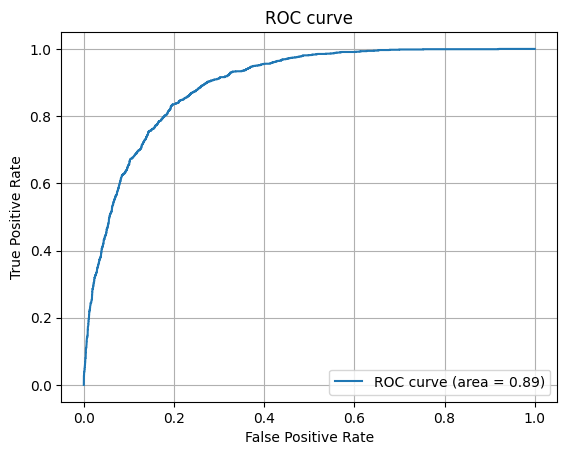

accuracy 0.8546328526437925
precision 0.6803097345132744


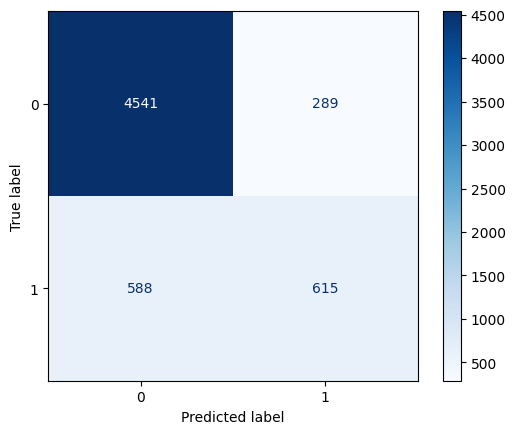

In [20]:
# AUCを計算
fpr, tpr, thresholds = roc_curve(np.asarray(y_test), y_pred)
print("AUC", auc(fpr, tpr))

# ROC曲線をプロット
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)' %auc(fpr, tpr))
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

# accuracy, precisionを計算
acc = accuracy_score(np.asarray(y_test), np.round(y_pred))
precision = precision_score(np.asarray(y_test), np.round(y_pred))
print("accuracy", acc)
print("precision", precision)

# 混同行列をプロット
y_pred = np.round(y_pred)
cm = confusion_matrix(np.asarray(y_test), np.where(y_pred < 0.5, 0, 1))
cmp = ConfusionMatrixDisplay(cm, display_labels=[0,1])
cmp.plot(cmap=plt.cm.Blues)
plt.show()

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

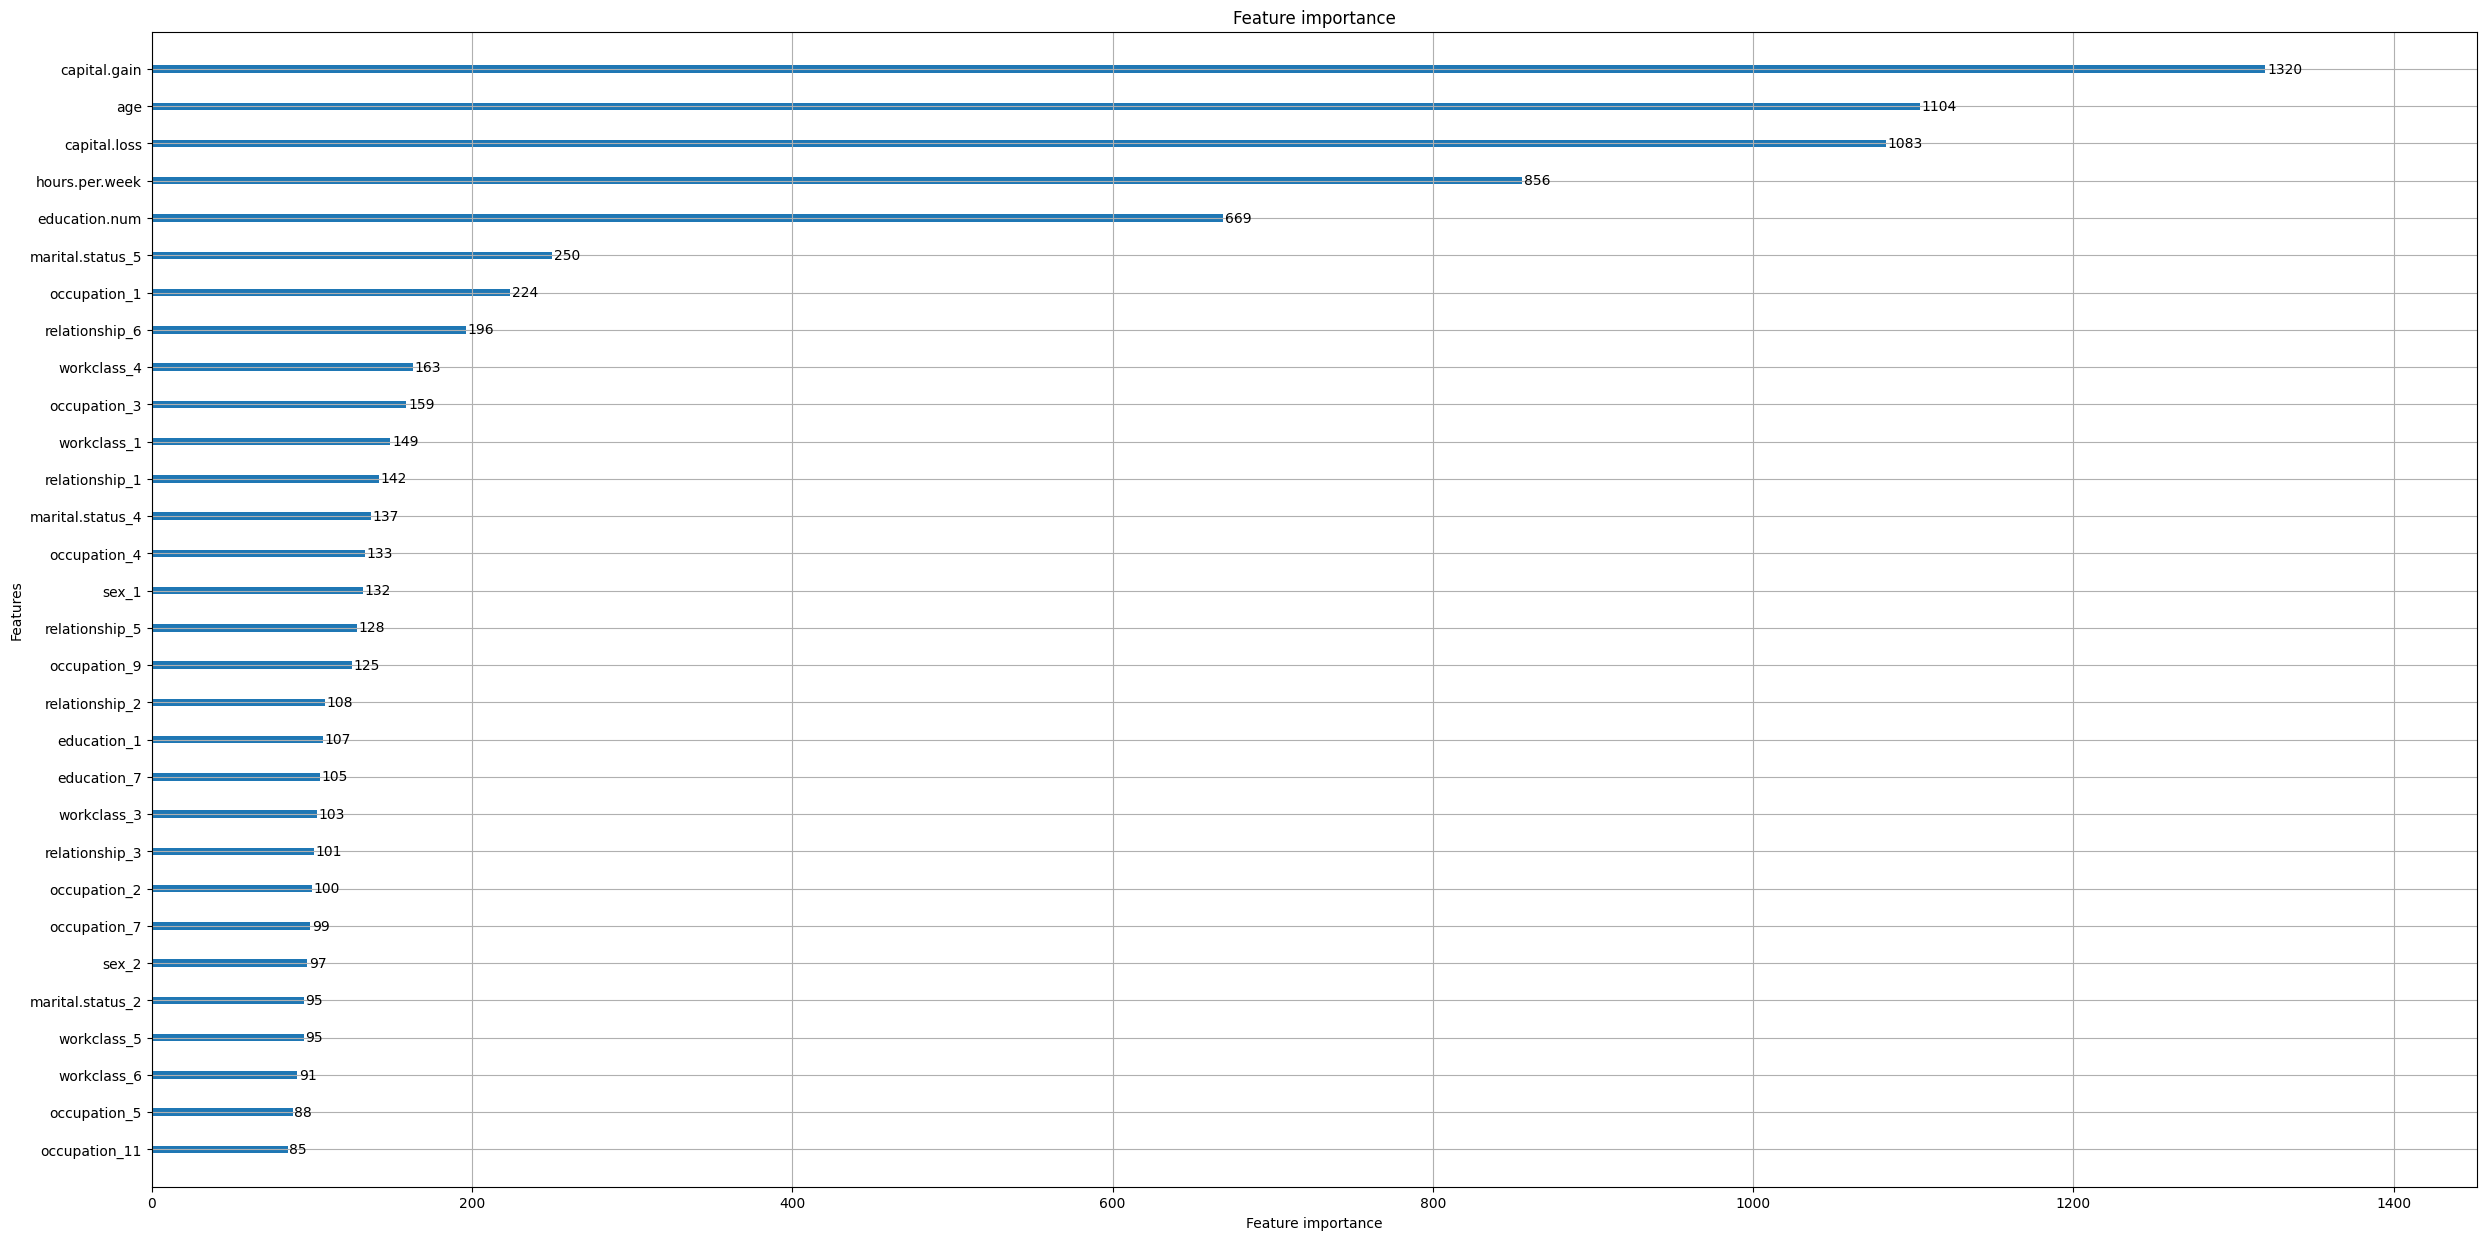

In [21]:
# 重要度としては「特徴量が分岐（ノード）の条件式で使用された回数」（＝デフォルト）
lgb.plot_importance(model, figsize=(30, 15), max_num_features=30, importance_type='split')

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

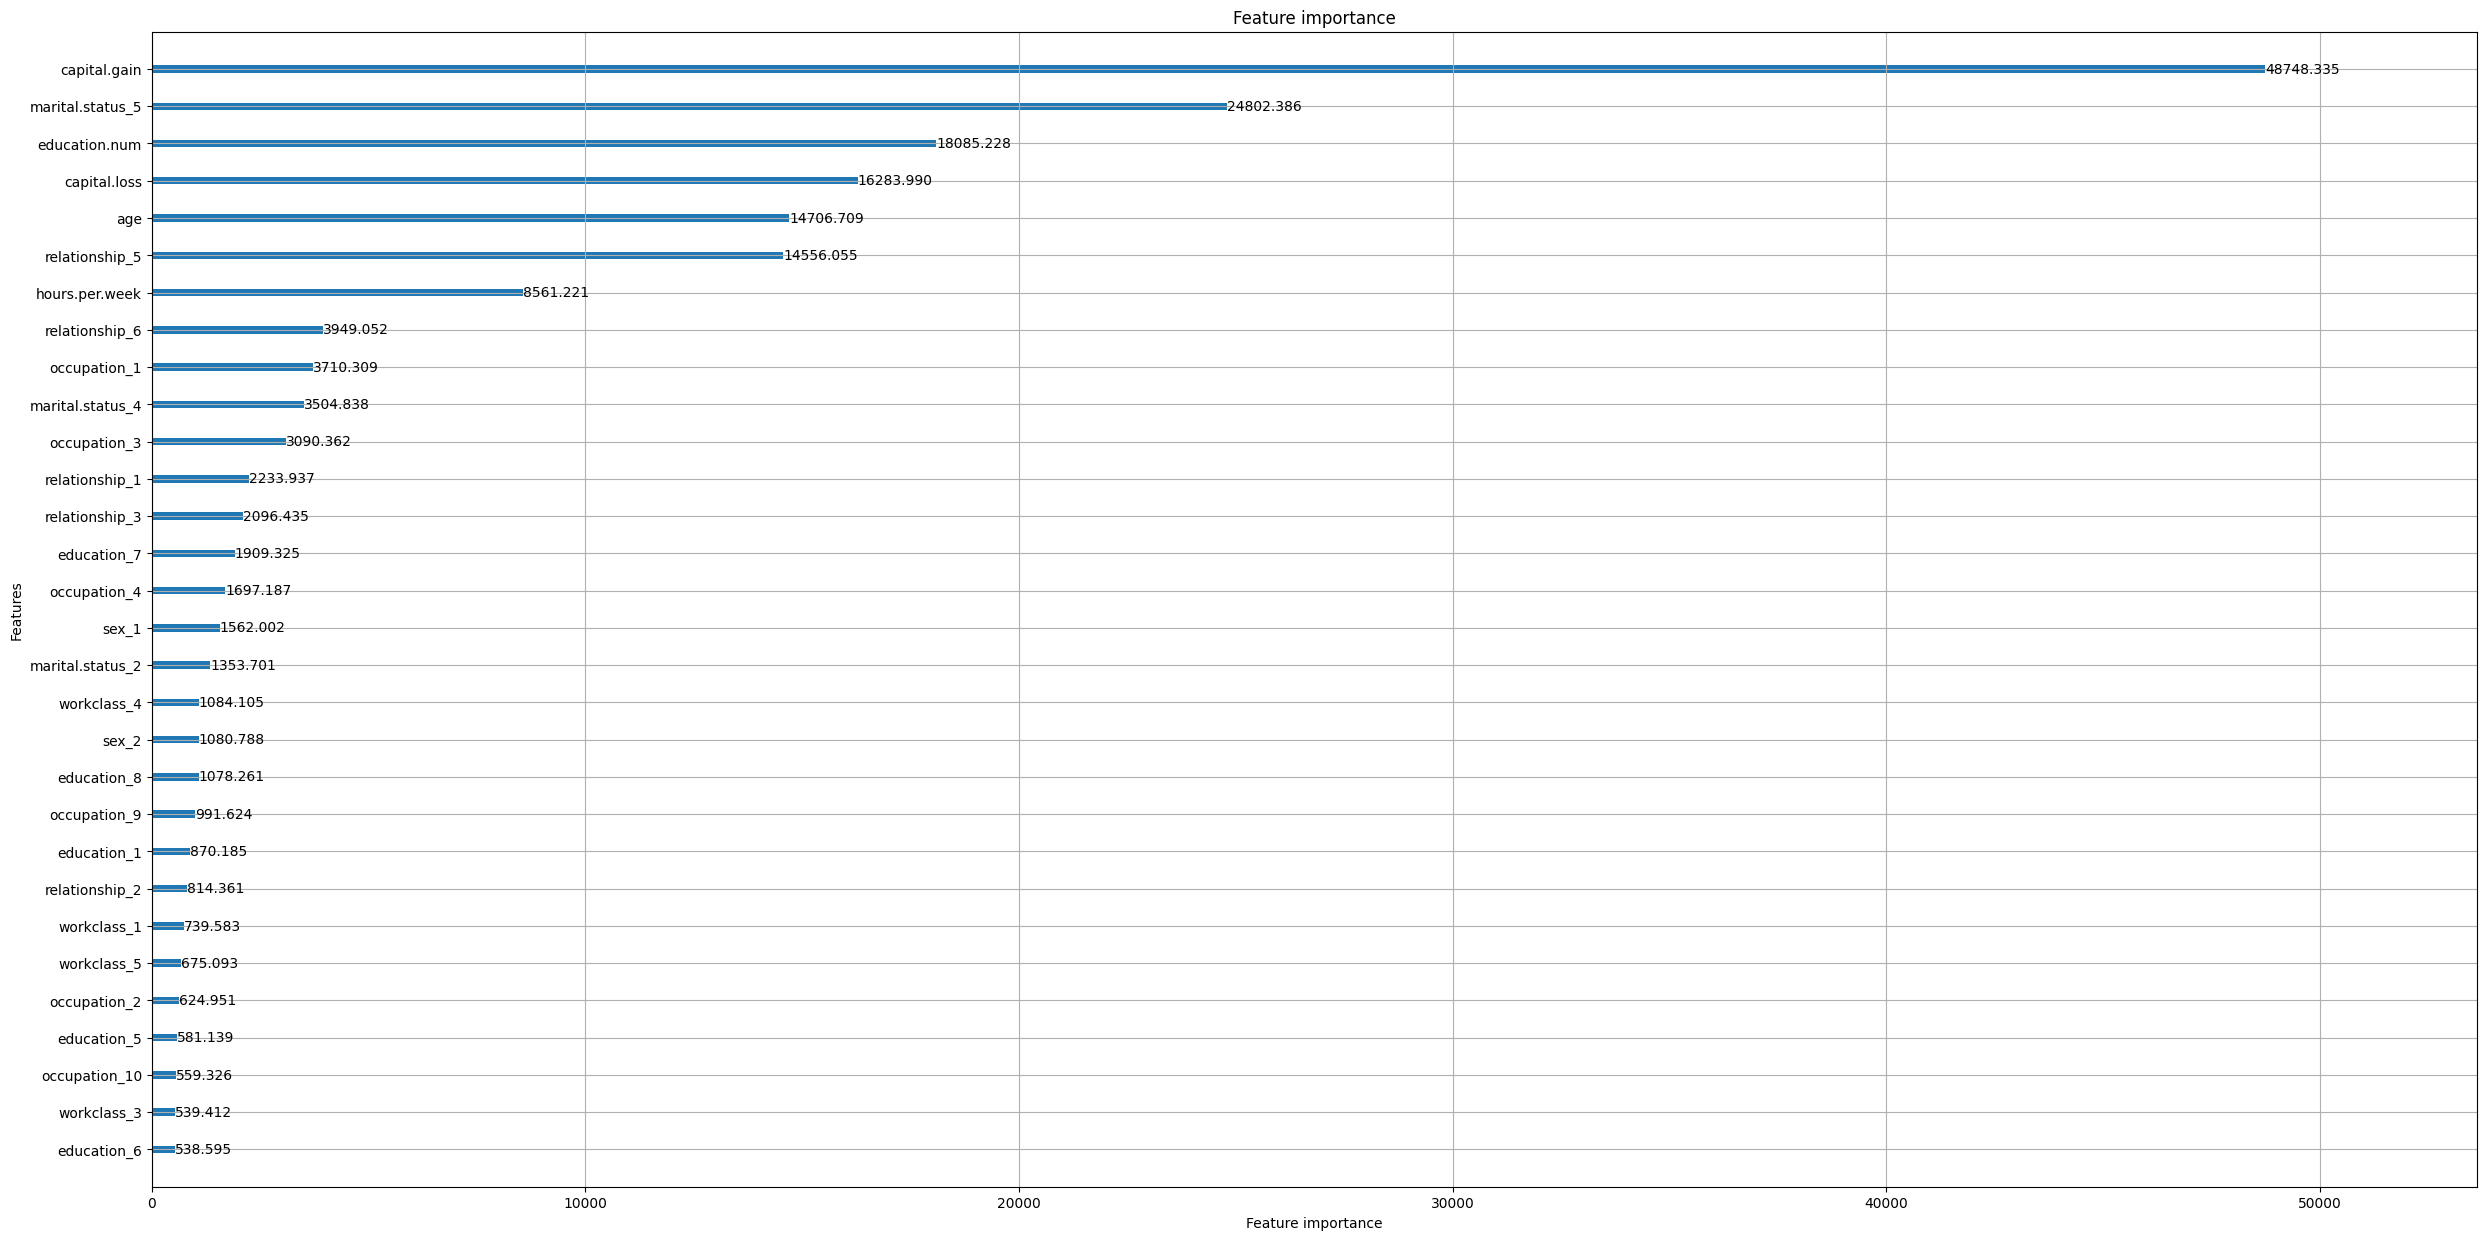

In [22]:
# 重要度としては「特徴量がある分岐（ノード）において目的関数の改善に寄与した度合い」
lgb.plot_importance(model, figsize=(30, 15), max_num_features=30, importance_type='gain')

In [23]:
# 特徴量重要度を棒グラフでプロットする関数 
def plot_feature_importance(df): 
    n_features = len(df)                              # 特徴量数(説明変数の個数) 
    df_plot = df.sort_values('importance')            # df_importanceをプロット用に特徴量重要度を昇順ソート 
    f_importance_plot = df_plot['importance'].values  # 特徴量重要度の取得 
    plt.barh(range(n_features), f_importance_plot, align='center') 
    cols_plot = df_plot['feature'].values             # 特徴量の取得 
    plt.yticks(np.arange(n_features), cols_plot)      # x軸,y軸の値の設定
    plt.xlabel('Feature importance')                  # x軸のタイトル
    plt.ylabel('Feature')                             # y軸のタイトル

In [24]:
# 特徴量重要度の算出 (データフレームで取得)
cols = list(df.drop('income',axis=1).columns) # 特徴量名のリスト(目的変数target以外)
# 特徴量重要度の算出方法 'gain'(推奨) : トレーニングデータの損失の減少量を評価
f_importance = np.array(model.feature_importance(importance_type='gain')) # 特徴量重要度の算出
f_importance = f_importance / np.sum(f_importance) # 正規化(必要ない場合はコメントアウト)
df_importance = pd.DataFrame({'feature':cols, 'importance':f_importance})
df_importance = df_importance.sort_values('importance', ascending=False) # 降順ソート

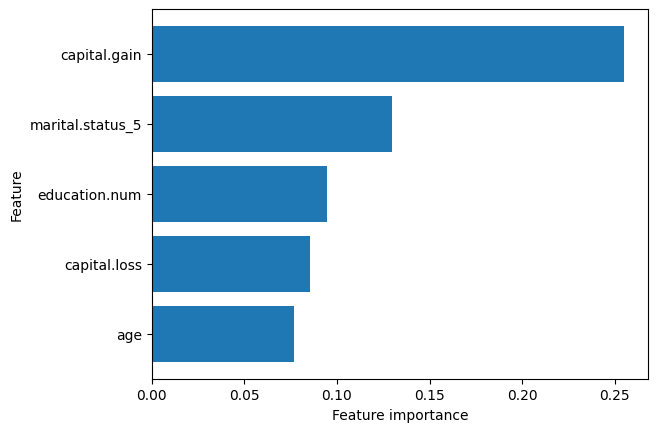

In [25]:
# 特徴量重要度の可視化
n_display = 5 # 上位10個に制限
plot_feature_importance(df_importance.iloc[:n_display,:])